In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [2]:
df = pd.read_csv('input/USvideos.csv')

### Veriseti

In [3]:
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23357,pH7VfJDq7f4,18.12.03,Why Bridges Move...,Practical Engineering,27,2018-02-27T12:00:08.000Z,"thermal expansion|""expansion joint""|""thermal m...",456470,14826,279,820,https://i.ytimg.com/vi/pH7VfJDq7f4/default.jpg,False,False,False,...and other musings on thermal movement of la...
23358,hV-yHbbrKRA,18.12.03,Macaroni - A Recipe From 1784,Townsends,27,2018-02-26T21:23:39.000Z,"townsends|""jas townsend and son""|""reenacting""|...",519220,13600,329,1350,https://i.ytimg.com/vi/hV-yHbbrKRA/default.jpg,False,False,False,Visit Our Website! ▶ http://www.townsends.us/ ...
23359,CwKp6Xhy3_4,18.12.03,Chris Young - Hangin' On,ChrisYoungVEVO,10,2018-02-26T08:00:02.000Z,"Losing sleep video|""losing sleep album""|""think...",1117570,7504,584,324,https://i.ytimg.com/vi/CwKp6Xhy3_4/default.jpg,False,False,False,Chris Young's Hangin' On from his #1 album Los...
23360,vQiiNGllGQo,18.12.03,Elderly man making sure his dog won't get wet,"Rock me, Joey Santiago.",15,2018-02-26T11:09:32.000Z,"dog|""cute""|""adorable""|""doggo""|""doge""|""old""|""ma...",713574,12448,146,1474,https://i.ytimg.com/vi/vQiiNGllGQo/default.jpg,False,False,False,very wholesome stuff.\n\nThis video was taken ...


### Kategorilerdeki video sayıları

In [4]:
df["category_id"].value_counts()

24    5379
10    3366
26    2241
23    1978
25    1907
22    1886
28    1477
1     1324
17    1238
27    1002
15     593
2      340
20     305
19     262
29      48
43      16
Name: category_id, dtype: int64

### Kategorilere göre ortalama like,dislike, comment sayıları

In [5]:
df.groupby("category_id").mean()[["likes","dislikes","comment_count"]]

,likes,dislikes,comment_count
category_id,,,
1,47593.034743,2027.794562,6003.651813
2,9989.032353,613.911765,1730.438235
10,120687.778075,4003.628045,10383.559418
15,16425.096121,389.399663,2474.376054
17,30259.176898,2066.235057,3256.199515
19,9193.538168,839.041985,1833.011450
20,36906.295082,2456.649180,7578.383607
22,36033.730117,1829.890244,4491.865854
23,55259.666330,1771.822548,5432.868554


### Kanal ismine göre ortalama like, dislike, comment sayıları

In [6]:
df.groupby("channel_title").mean()[["likes","dislikes","comment_count"]]

,likes,dislikes,comment_count
channel_title,,,
12 News,176.000000,45.000000,0.000000
1MILLION Dance Studio,31395.214286,301.571429,706.642857
1theK (원더케이),192808.526316,3333.105263,13456.263158
20th Century Fox,100548.132353,2854.941176,6535.691176
2CELLOS,11450.000000,122.500000,458.500000
...,...,...,...
ТСН,1667.000000,418.000000,1082.000000
ワーナー ブラザース 公式チャンネル,25827.000000,1021.333333,3593.333333
圧倒的不審者の極み!,11565.375000,883.750000,4131.250000


### Kategorilere göre max izlenme sayıları

In [7]:
df.groupby("category_id").max()[["views"]]

,views
category_id,
1,36152111
2,25244097
10,102012605
15,6187457
17,29090799
19,23932421
20,10256746
22,56111957
23,17758014


### En yüksek görüntülenmeyi alan videonun title bilgisi

In [8]:
df[df["views"].max() == df["views"]]["title"].iloc[0]

'YouTube Rewind: The Shape of 2017 | #YouTubeRewind'

### Kategori ID'lerine göre video sayıları

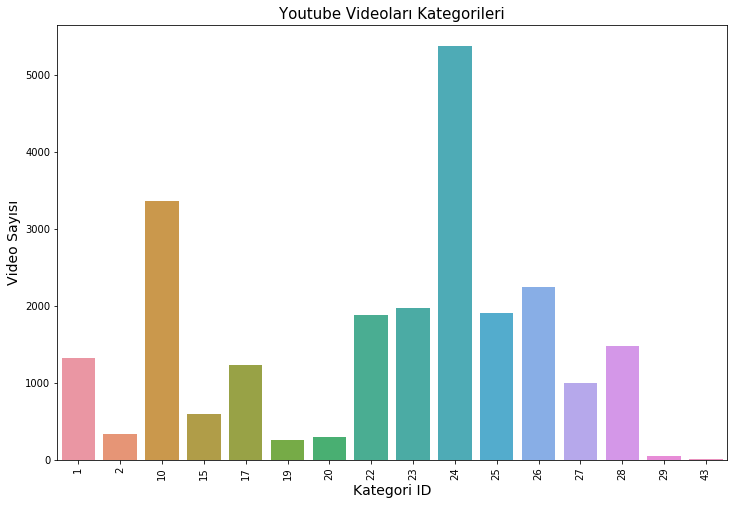

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x="category_id", data=df)
plt.ylabel('Video Sayısı', fontsize=14)
plt.xlabel('Kategori ID', fontsize=14)
plt.xticks(rotation='vertical')
plt.title("Youtube Videoları Kategorileri", fontsize=15)
plt.show()

### Elbow method kullanılarak clustering yapılması

In [10]:
cluster = df[['likes','dislikes', 'views', 'comment_count']]

In [11]:
cluster

,likes,dislikes,views,comment_count
0,57527,2966,748374,15954
1,97185,6146,2418783,12703
2,146033,5339,3191434,8181
3,10172,666,343168,2146
4,132235,1989,2095731,17518
...,...,...,...,...
23357,14826,279,456470,820
23358,13600,329,519220,1350
23359,7504,584,1117570,324
23360,12448,146,713574,1474


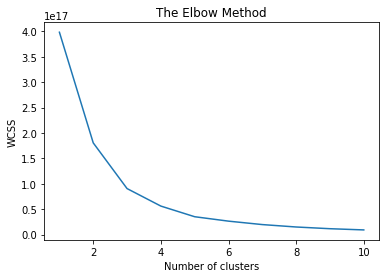

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Veri setimizdeki 'comments_disabled', 'ratings_disabled', 'video_error_or_removed' sayıları

In [13]:
print(df.shape)
print(df.isnull().values.any())



(23362, 16)
True


In [14]:
youtube = df.dropna(how='any',axis=0)
youtube.describe()
youtube.drop(['video_id','thumbnail_link'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


False    22544
True       385
Name: comments_disabled, dtype: int64


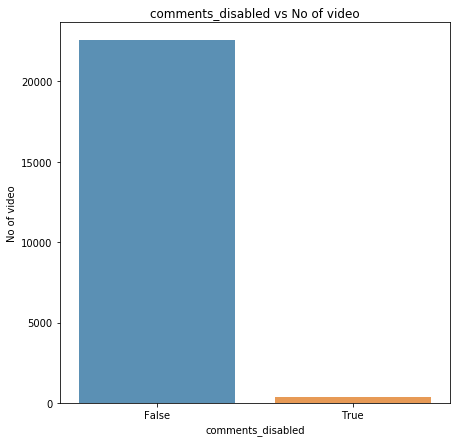

False    22784
True       145
Name: ratings_disabled, dtype: int64


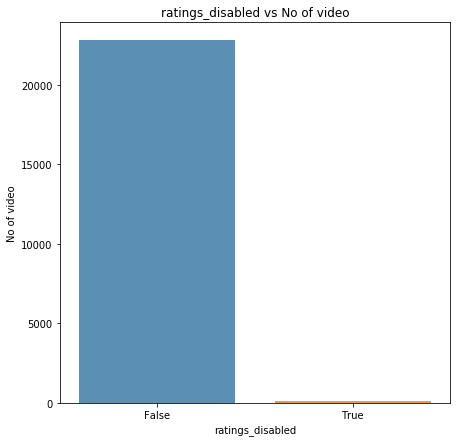

False    22927
True         2
Name: video_error_or_removed, dtype: int64


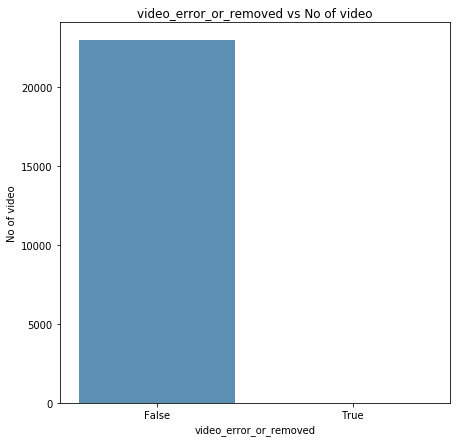

In [15]:
youtube.apply(lambda x: len(x.unique()))
for x in (['comments_disabled','ratings_disabled','video_error_or_removed']):
    count=youtube[x].value_counts()
    print(count)
    plt.figure(figsize=(7,7))
    sns.barplot(count.index, count.values, alpha=0.8)
    plt.title('{} vs No of video'.format(x))
    plt.ylabel('No of video')
    plt.xlabel('{}'.format(x))
    plt.show()

### Lineer Regresyon kullanılarak görüntülenme sayılarının tahminlenmesi

In [16]:
df.drop(['trending_date','publish_time','tags','title','description','channel_title'],axis=1,inplace=True)

In [17]:
df.drop(['video_id','thumbnail_link'],axis=1,inplace=True)

In [18]:
df ### Güncellenmiş veriseti

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,22,748374,57527,2966,15954,False,False,False
1,24,2418783,97185,6146,12703,False,False,False
2,23,3191434,146033,5339,8181,False,False,False
3,24,343168,10172,666,2146,False,False,False
4,24,2095731,132235,1989,17518,False,False,False
...,...,...,...,...,...,...,...,...
23357,27,456470,14826,279,820,False,False,False
23358,27,519220,13600,329,1350,False,False,False
23359,10,1117570,7504,584,324,False,False,False
23360,15,713574,12448,146,1474,False,False,False


In [19]:
views=df['views']
youtube_view=df.drop(['views'],axis=1,inplace=False)
train,test,y_train,y_test=train_test_split(youtube_view,views, test_size=0.2,shuffle=False)
print(train.shape,test.shape,y_train.shape,y_test.shape)

(18689, 7) (4673, 7) (18689,) (4673,)


In [20]:
model = LinearRegression()
model.fit(train, y_train)
y_pred = model.predict(test)
y_pred

array([191311.29638488, 387944.53892637, 371931.61375569, ...,
       447891.13591827, 467765.97085461, 416276.3834769 ])

In [21]:
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))

Root means score 2115858.0078345896
Variance score: 0.40
Result : 0.3998759152880331


In [22]:
d1 = {'Views': y_test, 'Predicted Views': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

         Views  Predicted Views
18689    34110     1.913113e+05
18690   312563     3.879445e+05
18691   148565     3.719316e+05
18692   343814     5.949086e+05
18693  1858332     1.358816e+06
...        ...              ...
23357   456470     5.733893e+05
23358   519220     5.012115e+05
23359  1117570     4.478911e+05
23360   713574     4.677660e+05
23361   422979     4.162764e+05

[4673 rows x 2 columns]


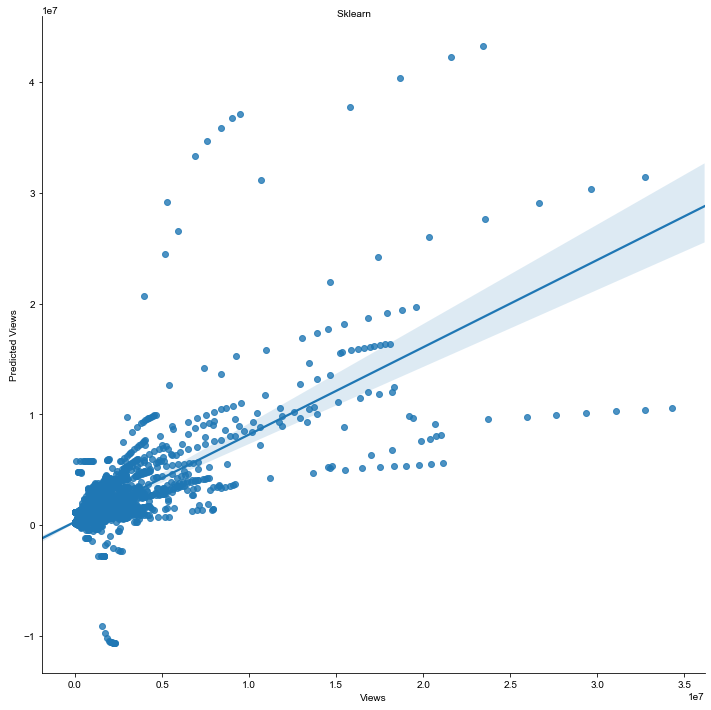

In [23]:
lm1 = sns.lmplot(x="Views", y="Predicted Views", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=10)
sns.set(font_scale = 1.2)

### Beğenme sayılarının tahminlenmesi

In [24]:
likes=df['likes']
youtube_like=df.drop(['likes'],axis=1,inplace=False)
train,test,y_train,y_test=train_test_split(youtube_like,likes, test_size=0.2,shuffle=False)
print(train.shape,test.shape,y_train.shape,y_test.shape)

(18689, 7) (4673, 7) (18689,) (4673,)


In [25]:
model = LinearRegression()
model.fit(train, y_train)
y_pred = model.predict(test)
y_pred

array([  -59.93294634,  8498.5644908 , 12099.1378607 , ...,
       34263.77796356, 27204.06687126, 27188.53253017])

In [26]:
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))

Root means score 66868.42144854508
Variance score: 0.75
Result : 0.7518342828477124


In [27]:
d1 = {'Likes': y_test, 'Predicted Likes': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

       Likes  Predicted Likes
18689    180       -59.932946
18690   7792      8498.564491
18691   6965     12099.137861
18692  11995      9369.963955
18693  47757     62812.852180
...      ...              ...
23357  14826     11856.298728
23358  13600     14919.288623
23359   7504     34263.777964
23360  12448     27204.066871
23361   7408     27188.532530

[4673 rows x 2 columns]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


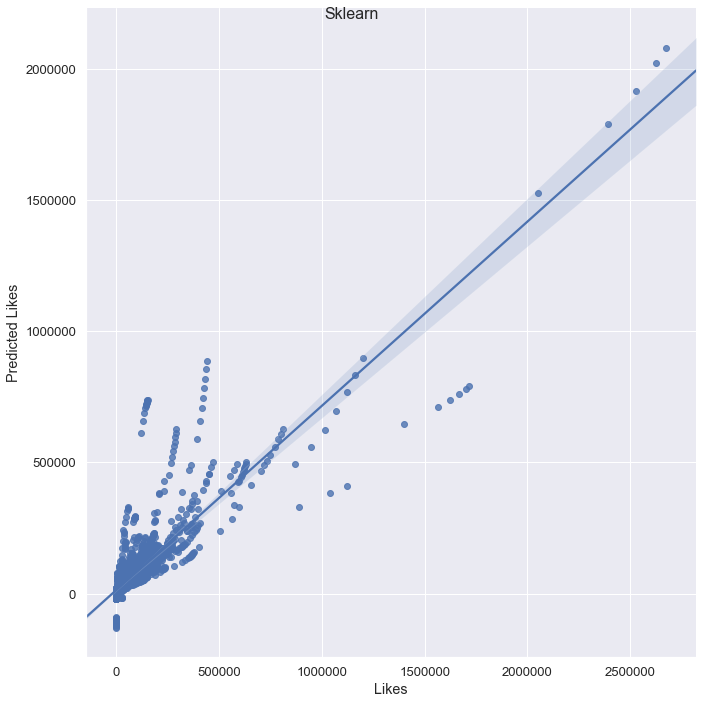

In [28]:
lm1 = sns.lmplot(x="Likes", y="Predicted Likes", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn", fontsize=16)
sns.set(font_scale = 1.5)

### Yorum sayılarının tahminlenmesi

In [29]:
comment_count=df['comment_count']
youtube_comment=df.drop(['comment_count'],axis=1,inplace=False)
train,test,y_train,y_test=train_test_split(youtube_comment,comment_count, test_size=0.2,shuffle=False)
print(train.shape,test.shape,y_train.shape,y_test.shape)

(18689, 7) (4673, 7) (18689,) (4673,)


In [30]:
model = LinearRegression()
model.fit(train, y_train)

y_pred = model.predict(test)
y_pred

array([ 1076.31130759,  1396.92537428,   734.61705816, ...,
       -1758.43090822,   128.89772883,  -362.94164664])

In [31]:
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(test, y_test))

Root means score 12605.123014851084
Variance score: 0.64
Result : 0.6387455529568723


In [32]:
d1 = {'Comments': y_test, 'Predicted Comments': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

       Comments  Predicted Comments
18689        60         1076.311308
18690       497         1396.925374
18691       666          734.617058
18692      1443         3196.764843
18693      4779         3181.531054
...         ...                 ...
23357       820         2248.438335
23358      1350         1944.443104
23359       324        -1758.430908
23360      1474          128.897729
23361      1548         -362.941647

[4673 rows x 2 columns]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


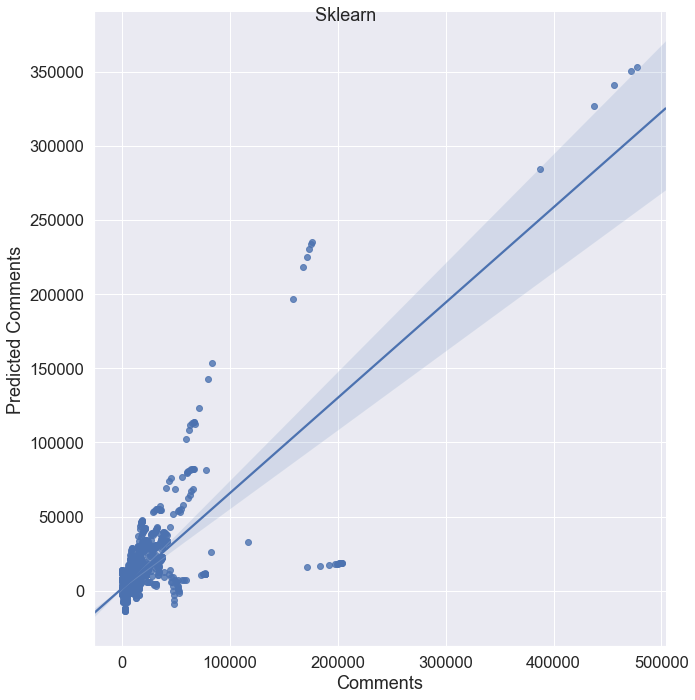

In [33]:
lm1 = sns.lmplot(x="Comments", y="Predicted Comments", data = SK, size = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

### Youtube'da video yayınlamak için en iyi zamanın belirlenmesi

In [34]:
youtube = pd.read_csv('input/USvideos.csv')
youtube = youtube.dropna(how='any',axis=0)
youtube.describe()
youtube.drop(['video_id','thumbnail_link'],axis=1,inplace=True)
tags=[x.count("|")+1 for x in youtube["tags"]]
youtube["No_tags"]=tags

desc_len=[len(x) for x in youtube["description"]]
youtube["desc_len"]=desc_len

title_len=[len(x) for x in youtube["title"]]
youtube["len_title"]=title_len
publish_time = pd.to_datetime(youtube['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
youtube['publish_time'] = publish_time.dt.time
youtube['publish_date'] = publish_time.dt.date
youtube['publish_date'] = publish_time.dt.date

youtube['publish_hour'] = publish_time.dt.hour
publish_h = [0] * 24

In [35]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline


publish_h = [0] * 24

for index, row in youtube.iterrows():
    publish_h[row["publish_hour"]] += 1
    
values = publish_h
ind = np.arange(len(values))

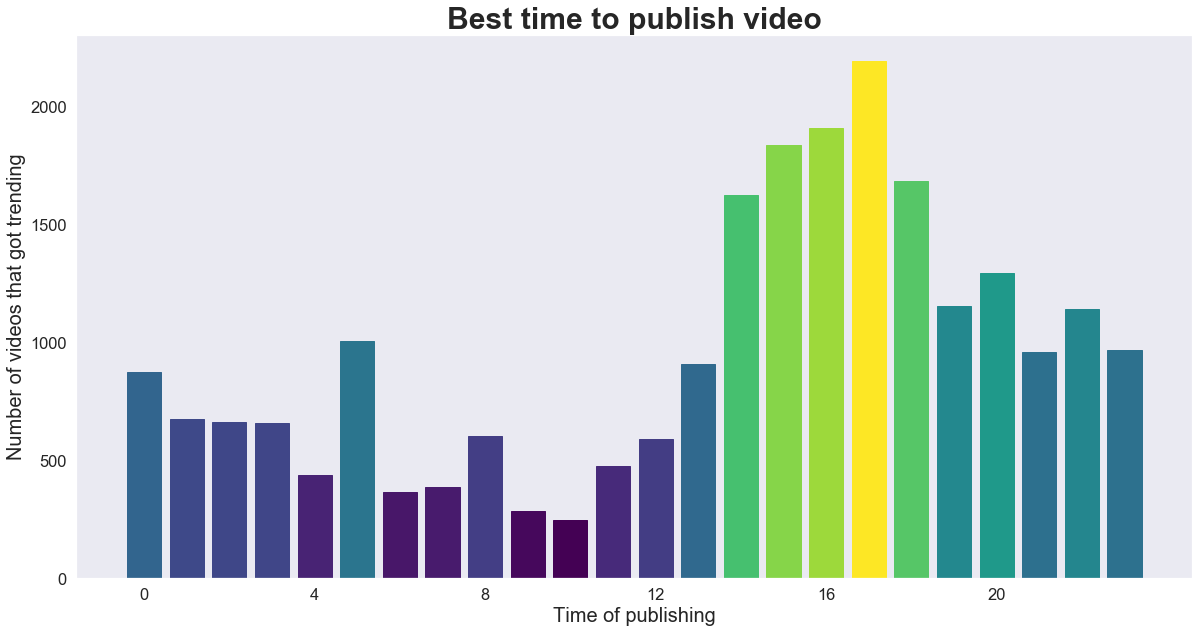

In [36]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)

for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Number of videos that got trending', fontsize=20)
plt.xlabel('Time of publishing', fontsize=20)
plt.title('Best time to publish video', fontsize=30, fontweight='bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0, 4, 8, 12, 16, 20])

plt.show()